In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
data=pd.read_csv('clean.csv',delimiter=';')

In [4]:
data['ngas']=[float(i[:4]+'e'+i[-2:]) for i in data.Ngas] 
data['T_CH3OH']=[float(i[:6]) for i in data['T(CH3OH)']]
data['N_CH3OH']=[float(i[:5]) for i in data['N(CH3OH)']]
data['T_CH3CCH']=[float(i[:5]) for i in data['T(CH3CCH)']]
data['N_CH3CCH']=[float(i[:4]) for i in data['N(CH3CCH)']]
data['T_CH3CN']=[float(i[:5]) for i in data['T(CH3CN)']]
data['N_CH3CN']=[float(i[:4]) for i in data['N(CH3CN)']]

In [7]:
selec=data[['Temp', 'Mgas',
        'ngas', 'T_CH3OH', 'N_CH3OH', 'T_CH3CCH', 'N_CH3CCH',
       'T_CH3CN', 'N_CH3CN']]

# MinMax + LLE + GMM

In [8]:
from sklearn.preprocessing import MinMaxScaler
  
scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(selec.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['Temp', 'Mgas',
        'ngas', 'T_CH3OH', 'N_CH3OH', 'T_CH3CCH', 'N_CH3CCH',
       'T_CH3CN', 'N_CH3CN'])
 
print("Scaled Dataset Using MinMaxScaler")
df_scaled.head()

Scaled Dataset Using MinMaxScaler


,Temp,Mgas,ngas,T_CH3OH,N_CH3OH,T_CH3CCH,N_CH3CCH,T_CH3CN,N_CH3CN
0,1.000000,0.134799,0.071797,0.685714,0.229946,0.333333,0.441176,1.000000,1.000000
1,0.387755,0.039139,0.074886,0.400000,0.004730,0.333333,0.014706,0.387755,0.009091
2,0.693878,0.129191,0.056971,0.600000,0.279950,0.444444,0.191176,0.693878,0.100000
3,0.530612,0.088931,0.032878,0.542857,0.009931,0.555556,0.117647,0.530612,0.022727
4,0.387755,0.157116,0.058515,1.000000,0.039933,0.222222,0.250000,0.387755,0.045455


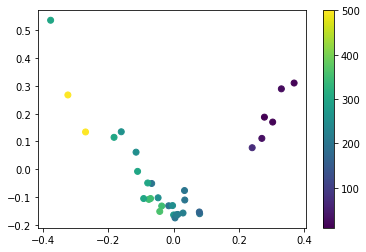

In [9]:
XS=df_scaled
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=20, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
im=ax.scatter(out[:, 0], out[:, 1],c=selec.Temp)
fig.colorbar(im, ax=ax)
#ax.set_ylim(0.15, -0.15);
#pretty much the same, PCA preserves info

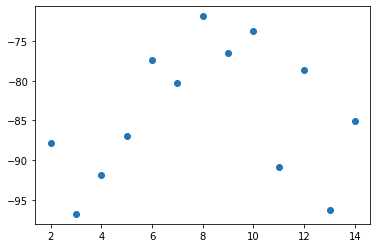

In [18]:
from sklearn.mixture import GaussianMixture as GMM
ran=range(2,15)
bic=[]
for i in ran:
    gmm=GMM(i)
    gmm.fit(out)
    bic+=[gmm.bic(out)]
plt.scatter(ran,bic)

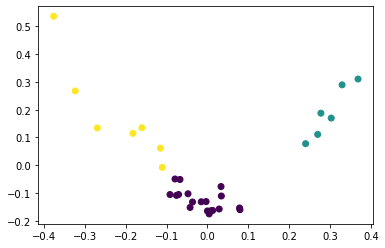

In [19]:
gmm=GMM(3)
gmm.fit(out)
pred=gmm.predict(out)
plt.scatter(out[:, 0], out[:, 1],c=pred)

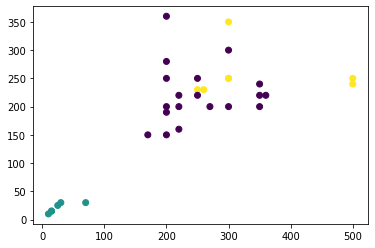

In [20]:
plt.scatter(selec.Temp,selec.T_CH3OH,c=pred)

In [21]:
selec['Groups']=pred

<ipython-input-21-1435d503fee9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selec['Groups']=pred


In [22]:
selec['Sources']=data['Sources']

<ipython-input-22-3217965c8825>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selec['Sources']=data['Sources']


In [25]:
selec.to_csv('LLE_prediction.csv')